In [1]:
# !pip install catboost
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import tqdm
# import gc
# import math

import pandas as pd
import numpy as np
# import pickle
import os
import seaborn as sns 
# from datetime import datetime, timedelta
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np


In [2]:
path_test = 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/test.csv'

path_train= 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/train.csv'

path_sub = 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/sample_submission.csv'

ori_train = pd.read_csv(path_train)
ori_test = pd.read_csv(path_test)
sample_submission = pd.read_csv(path_sub)

train_size = len(ori_train)
test_size = len(ori_test)

display(ori_train,ori_test)


,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,501948,True,True,True,True,False,False,1,7,4,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1
501949,501949,True,False,False,True,False,False,1,1,2,...,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1


,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,True,True,True,False,False,False,2,0,4,...,1,2,759,147,1,5,91,425040,726084,2020-12-17 01:06:26
46400,46400,True,False,False,True,False,False,2,0,4,...,1,2,759,147,1,4,91,290061,156948,2020-12-29 21:57:25
46401,46401,True,True,False,True,True,True,2,0,3,...,1,2,759,147,1,4,288,307951,175069,2020-12-10 19:09:09
46402,46402,True,True,False,True,True,True,1,3,3,...,3,2,759,147,1,5,288,308354,174849,2020-12-07 14:04:34


In [3]:
sample_submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [4]:
ori_train.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target'],
      dtype='object')

In [5]:
ori_train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [6]:
ori_train.iloc[:,1]

0          True
1         False
2         False
3         False
4          True
          ...  
501946    False
501947     True
501948     True
501949     True
501950     True
Name: d_l_match_yn, Length: 501951, dtype: bool

In [7]:
ori_test.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt'],
      dtype='object')

In [8]:
train = ori_train.drop(['id', 'contents_open_dt'], axis=1) 
test = ori_test.drop(['id', 'contents_open_dt'], axis=1)

In [9]:
train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target'],
      dtype='object')

## Examine the Distribution of the Target Column

In [10]:
# target data의 imbalance를 확인
train['target'].value_counts()

0    251106
1    250845
Name: target, dtype: int64

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

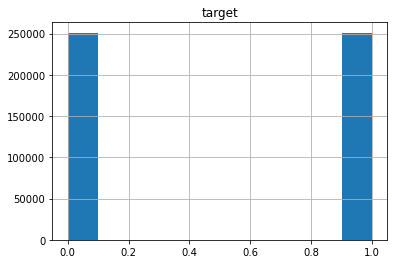

In [11]:
#분류모델을 할 때는 히스토 그램을 하는게 좋다
# train['target'].astype(int).plot.hist();
train.hist('target')

## Examine Missing Values

- No missing values

In [12]:
train.isnull().sum()

d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
target                    0
dtype: int64

In [13]:
test.isnull().sum()

d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
dtype: int64

## Label Encoding and One-Hot Encoding
Let's implement the policy described here (https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor):  
- for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, 
- for any categorical variable with more than 2 unique categories, we will use one-hot encoding.
- For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [14]:
train.dtypes

d_l_match_yn               bool
d_m_match_yn               bool
d_s_match_yn               bool
h_l_match_yn               bool
h_m_match_yn               bool
h_s_match_yn               bool
person_attribute_a        int64
person_attribute_a_1      int64
person_attribute_b        int64
person_prefer_c           int64
person_prefer_d_1         int64
person_prefer_d_2         int64
person_prefer_d_3         int64
person_prefer_e           int64
person_prefer_f           int64
person_prefer_g           int64
person_prefer_h_1         int64
person_prefer_h_2         int64
person_prefer_h_3         int64
contents_attribute_i      int64
contents_attribute_a      int64
contents_attribute_j_1    int64
contents_attribute_j      int64
contents_attribute_c      int64
contents_attribute_k      int64
contents_attribute_l      int64
contents_attribute_d      int64
contents_attribute_m      int64
contents_attribute_e      int64
contents_attribute_h      int64
person_rn                 int64
contents

In [15]:
# Number of unique classes in each object column
# train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
train.select_dtypes('bool').apply(pd.Series.nunique, axis = 0)

d_l_match_yn    2
d_m_match_yn    2
d_s_match_yn    2
h_l_match_yn    2
h_m_match_yn    2
h_s_match_yn    2
dtype: int64

In [16]:
test.select_dtypes('bool').apply(pd.Series.nunique, axis = 0)

d_l_match_yn    2
d_m_match_yn    2
d_s_match_yn    2
h_l_match_yn    2
h_m_match_yn    2
h_s_match_yn    2
dtype: int64

-  2 unique categories 이므로, label encoding 해도 괜찮음
-  여기서는 원핫으로

### One-Hot encoding

In [17]:
# oh_train = pd.get_dummies(train, columns = [ 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
#        'h_m_match_yn', 'h_s_match_yn'])
# oh_train


# one-hot encoding of categorical variables
oh_train= pd.get_dummies(train)
oh_test = pd.get_dummies(test)


print('Training Features shape: ', oh_train.shape)
print('Testing Features shape: ', oh_test.shape)

Training Features shape:  (501951, 33)
Testing Features shape:  (46404, 32)


In [18]:
oh_train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target'],
      dtype='object')

In [19]:
oh_test.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn'],
      dtype='object')

## 상관관계 구하기

- Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. 
- One way to try and understand the data is by looking for correlations between the features and the target. 
- We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.
<br><br>

- The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”  
.20-.39 “weak”  
.40-.59 “moderate”  
.60-.79 “strong”  
.80-1.0 “very strong”  

In [20]:
# Correlation matrix between numerical values and target
train_num = train[['person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn','target']].corr()

# train_num

corr_train = train_num.apply(lambda x: round(x ,2))
corr_train

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
person_attribute_a,1.00,-0.67,0.02,0.05,0.09,0.07,0.05,-0.17,NaN,NaN,...,0.01,-0.00,0.03,0.05,0.00,-0.11,0.02,0.03,0.02,-0.02
person_attribute_a_1,-0.67,1.00,-0.03,-0.05,-0.05,-0.04,-0.00,0.24,NaN,NaN,...,-0.02,0.01,-0.06,-0.02,-0.01,0.17,-0.02,-0.04,-0.03,0.02
person_attribute_b,0.02,-0.03,1.00,0.03,-0.30,-0.30,-0.29,0.04,NaN,NaN,...,0.02,-0.00,0.12,-0.24,0.07,0.06,-0.02,-0.04,-0.03,-0.00
person_prefer_c,0.05,-0.05,0.03,1.00,0.01,0.01,0.01,-0.08,NaN,NaN,...,0.08,-0.01,0.10,-0.00,0.05,-0.03,-0.02,-0.01,-0.01,0.02
person_prefer_d_1,0.09,-0.05,-0.30,0.01,1.00,0.78,0.81,0.03,NaN,NaN,...,-0.01,0.02,-0.16,0.58,-0.07,0.05,0.07,0.01,0.01,-0.03
person_prefer_d_2,0.07,-0.04,-0.30,0.01,0.78,1.00,0.74,0.02,NaN,NaN,...,-0.01,0.02,-0.16,0.56,-0.06,0.05,0.07,0.01,0.01,-0.03
person_prefer_d_3,0.05,-0.00,-0.29,0.01,0.81,0.74,1.00,0.05,NaN,NaN,...,-0.02,0.02,-0.17,0.54,-0.06,0.09,0.07,0.00,0.01,-0.02
person_prefer_e,-0.17,0.24,0.04,-0.08,0.03,0.02,0.05,1.00,NaN,NaN,...,-0.04,0.01,-0.07,0.03,-0.01,0.25,0.02,0.00,0.02,0.03
person_prefer_f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_prefer_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


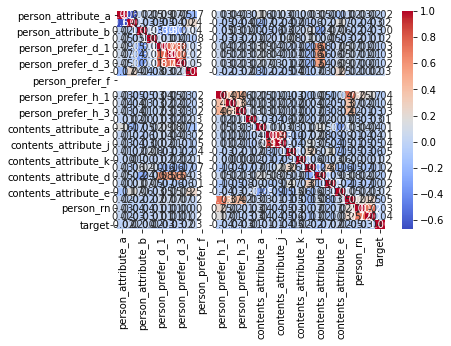

In [21]:
# Correlation matrix between numerical values 

g = sns.heatmap(train[['person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn','target']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### 1.Find correlations with the target -n번째 상/하위 컬럼 추출하기
- nlargest, nsmallest 를 사용하여 지정한 컬럼 기준 상위, 하위 데이터를 추출할 수 있다. 이를 사용하여 상관관계지수가 높거나 낮은 데이터를 추출한다.

- sort_values()와 head를 조합한 방법 보다 더 나은 성능을 제공한다.

- This method is equivalent to df.sort_values(columns, ascending=False).head(n), but more performant.

In [22]:
# 'target' 컬럼기준으로 상위 5개만 뽑기
# df.nlargest(5, 'target')
corr5 = train_num.nlargest(5, 'target')
corr5 = corr5[list(corr5.index)]
corr5

,target,person_prefer_e,contents_attribute_e,contents_attribute_k,person_attribute_a_1
target,1.000000,0.032915,0.024869,0.023783,0.022103
person_prefer_e,0.032915,1.000000,0.249474,0.012769,0.237706
contents_attribute_e,0.024869,0.249474,1.000000,0.061576,0.173618
contents_attribute_k,0.023783,0.012769,0.061576,1.000000,0.007173
person_attribute_a_1,0.022103,0.237706,0.173618,0.007173,1.000000


In [23]:
#### 2.Find correlations with the target and sort
correlations = oh_train.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 h_m_match_yn            0.004264
h_s_match_yn            0.006311
contents_attribute_i    0.014837
person_prefer_c         0.016768
h_l_match_yn            0.018988
person_attribute_a_1    0.022103
contents_attribute_k    0.023783
contents_attribute_e    0.024869
person_prefer_e         0.032915
d_s_match_yn            0.087591
d_m_match_yn            0.118406
d_l_match_yn            0.142670
target                  1.000000
person_prefer_f              NaN
person_prefer_g              NaN
Name: target, dtype: float64

Most Negative Correlations:
 contents_attribute_d   -0.069321
contents_attribute_c   -0.050670
contents_attribute_h   -0.047302
person_prefer_h_1      -0.043870
contents_attribute_j   -0.036308
person_prefer_h_2      -0.035839
contents_rn            -0.035738
person_rn              -0.031704
person_prefer_h_3      -0.029770
person_prefer_d_1      -0.029676
person_prefer_d_2      -0.028528
person_prefer_d_3      -0.023895
contents_attribute_l 

(array([ 66676.,      0.,    366.,      0.,   2323.,      0., 139683.,
             0.,      0., 160100.,      0.,  81635.,      0.,  31407.,
             0.,   8641.,      0.,      0.,   6259.,      0.,   1473.,
             0.,   1936.,      0.,   1452.]),
 array([ 0.  ,  0.44,  0.88,  1.32,  1.76,  2.2 ,  2.64,  3.08,  3.52,
         3.96,  4.4 ,  4.84,  5.28,  5.72,  6.16,  6.6 ,  7.04,  7.48,
         7.92,  8.36,  8.8 ,  9.24,  9.68, 10.12, 10.56, 11.  ]),
 <BarContainer object of 25 artists>)

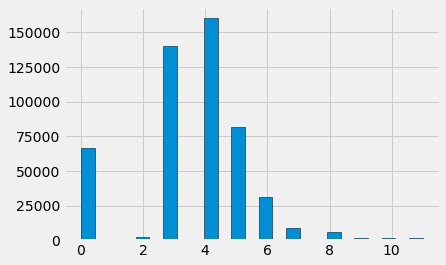

In [24]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# # Plot the distribution of ages in years
plt.hist(oh_train['person_prefer_e'], edgecolor = 'k', bins = 25)
# plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

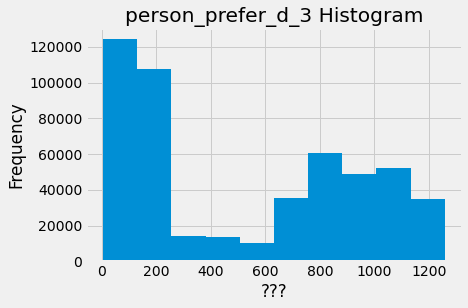

In [25]:
# 아무 feature 나 한번 찍어 봤음
oh_train['person_prefer_d_3'].plot.hist(title = 'person_prefer_d_3 Histogram');
plt.xlabel('???');

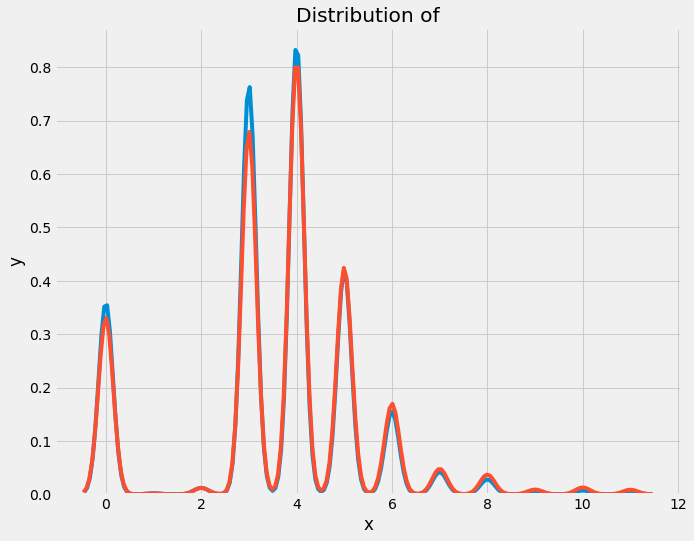

In [26]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(oh_train.loc[oh_train['target'] == 0, 'person_prefer_e'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(oh_train.loc[oh_train['target'] == 1, 'person_prefer_e'], label = 'target == 1')

# Labeling of plot
plt.xlabel('x'); plt.ylabel('y'); plt.title('Distribution of' );

이번에는 target와 Most Negative Correlations 끼리의 상관관계를 보자   
 contents_attribute_d   -0.069321  
contents_attribute_c   -0.050670  
contents_attribute_h   -0.047302  

In [27]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = oh_train[['contents_attribute_d', 'contents_attribute_c', 'contents_attribute_h','target']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,contents_attribute_d,contents_attribute_c,contents_attribute_h,target
contents_attribute_d,1.000000,-0.007760,0.078745,-0.069321
contents_attribute_c,-0.007760,1.000000,-0.048706,-0.050670
contents_attribute_h,0.078745,-0.048706,1.000000,-0.047302
target,-0.069321,-0.050670,-0.047302,1.000000


In [28]:
# 1인1 person_rn가 아님 
oh_train['person_rn'].nunique() 

300177

In [29]:
# 중복값 없음 
# Before
oh_train[oh_train.duplicated(keep=False)]

print("Before:", len(oh_train))

# After
oh_train = oh_train.drop_duplicates()

print("After:", len(oh_train))

Before: 501951
After: 501951


In [30]:
oh_train.describe()

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
count,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.0,501951.0,...,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,5.019510e+05,501951.000000,501951.00000
mean,1.340055,2.575767,2.782742,2.380049,537.296399,545.833926,534.994095,3.626302,1.0,1.0,...,1.386052,1.963307,1030.863194,581.505215,2.240486,3.922988,132.530916,5.141115e+05,337674.345074,0.49974
std,0.473728,2.390872,0.883072,1.827910,411.441926,403.328742,415.752072,1.846717,0.0,0.0,...,0.793128,0.188007,527.235733,413.915756,1.556468,1.159992,87.142309,2.943547e+05,219518.485557,0.50000
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.0,1.0,...,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,7.000000e+00,20.000000,0.00000
25%,1.000000,0.000000,2.000000,1.000000,117.000000,148.000000,136.000000,3.000000,1.0,1.0,...,1.000000,2.000000,597.000000,138.000000,1.000000,3.000000,57.000000,2.599785e+05,140899.000000,0.00000
50%,1.000000,2.000000,3.000000,1.000000,453.000000,464.000000,452.000000,4.000000,1.0,1.0,...,1.000000,2.000000,953.000000,581.000000,1.000000,4.000000,118.000000,4.981190e+05,304996.000000,0.00000
75%,2.000000,5.000000,4.000000,5.000000,935.000000,963.000000,929.000000,5.000000,1.0,1.0,...,1.000000,2.000000,1582.000000,974.000000,4.000000,4.000000,199.000000,7.656345e+05,535184.000000,1.00000
max,2.000000,7.000000,5.000000,5.000000,1258.000000,1258.000000,1258.000000,11.000000,1.0,1.0,...,4.000000,2.000000,2013.000000,1258.000000,5.000000,11.000000,311.000000,1.049005e+06,753628.000000,1.00000


## Aligning Training and Testing Data
There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [31]:
train_labels = oh_train['target']

# Align the training and testing data, keep only columns present in both dataframes
oh_train, oh_test = oh_train.align(oh_test, join = 'inner', axis = 1)

# Add the target back in
oh_train['target'] = train_labels

print('Training Features shape: ', oh_train.shape)
print('Testing Features shape: ', oh_test.shape)

Training Features shape:  (501951, 33)
Testing Features shape:  (46404, 32)


## Scaling

#### StandardScaler()
- 특성들의 평균을 0, 분산을 1 로 스케일링하는 것입니다.
- 즉, 특성들을 정규분포로 만드는 것입니다.
- 최솟값과 최댓값의 크기를 제한하지 않기 때문에, 어떤 알고리즘에서는 문제가 있을 수 있으며
- 이상치에 매우 민감합니다.
- 회귀보다 분류에 유용합니다.
- 훈련 데이터에는 fit_transform() 메서드를 적용하고, 테스트 데이터에는 transform() 메서드를 적용해야합니다.
- fit_transform() 은 fit 과 transform 이 결합된 단축 메서드입니다.

In [32]:
# 원래 데이터들의 평균과 분산 확인 
# Drop the target from the training data
if 'target' in oh_train:
    new_train =oh_train.drop(columns = ['target'])
else:
    new_train = oh_train.copy()
    
print('feature 들의 평균 값')
print(new_train.mean())
print('\nfeature 들의 분산 값')
print(new_train.var())

feature 들의 평균 값
d_l_match_yn                   0.628085
d_m_match_yn                   0.266215
d_s_match_yn                   0.149929
h_l_match_yn                   0.795572
h_m_match_yn                   0.364842
h_s_match_yn                   0.272196
person_attribute_a             1.340055
person_attribute_a_1           2.575767
person_attribute_b             2.782742
person_prefer_c                2.380049
person_prefer_d_1            537.296399
person_prefer_d_2            545.833926
person_prefer_d_3            534.994095
person_prefer_e                3.626302
person_prefer_f                1.000000
person_prefer_g                1.000000
person_prefer_h_1            116.394919
person_prefer_h_2            136.011991
person_prefer_h_3            122.784720
contents_attribute_i           2.447811
contents_attribute_a           2.332622
contents_attribute_j_1         5.893970
contents_attribute_j           1.237806
contents_attribute_c           1.386052
contents_attribute_k    

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer as Imputer

# Drop the target from the training data
if 'target' in oh_train:
    new_train =oh_train.drop(columns = ['target'])
else:
    new_train = oh_train.copy()
    
# Feature names
column_names = list(new_train.columns)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(new_train)

# 훈련 데이터 스케일링
new_train_scaled = scaler.transform(new_train)
# 테스트 데이터 스케일링
test = scaler.transform(oh_test)

print("\n=========== 표준화 ==============\n")

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
train_df = pd.DataFrame(data=new_train_scaled , columns= column_names) 
test_df = pd.DataFrame(data=test, columns = column_names)

print('feature 들의 평균 값')
print(train_df.mean())
print('\nfeature 들의 분산 값')
print(train_df.var())


=========== 표준화 ==============

feature 들의 평균 값
d_l_match_yn             -4.179941e-14
d_m_match_yn             -3.448367e-14
d_s_match_yn              8.201580e-14
h_l_match_yn             -5.928083e-14
h_m_match_yn             -2.212030e-13
h_s_match_yn             -1.222953e-13
person_attribute_a        9.488542e-15
person_attribute_a_1     -1.134812e-15
person_attribute_b        1.573617e-14
person_prefer_c           9.714324e-15
person_prefer_d_1        -3.085101e-14
person_prefer_d_2        -3.236185e-14
person_prefer_d_3         7.009763e-15
person_prefer_e           2.533175e-15
person_prefer_f           0.000000e+00
person_prefer_g           0.000000e+00
person_prefer_h_1         2.572605e-14
person_prefer_h_2        -8.720529e-15
person_prefer_h_3        -3.449129e-16
contents_attribute_i     -1.746886e-14
contents_attribute_a      4.188144e-15
contents_attribute_j_1   -5.565135e-15
contents_attribute_j      1.021122e-13
contents_attribute_c     -4.138186e-14
contents_attrib

In [34]:
test_df.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn
0,0.769507,-0.602327,-0.419967,0.50691,1.319435,1.635183,-0.717829,-0.659077,-0.886386,-0.754988,...,1.790281,-0.486746,0.195168,0.220275,0.622095,-0.796988,0.928465,1.497197,-0.408764,-0.459230
1,-1.299534,-0.602327,-0.419967,0.50691,-0.757900,-0.611552,1.393090,-1.077335,-0.886386,-0.207915,...,-0.558571,-0.486746,0.195168,1.100338,-0.733254,-0.796988,0.066390,1.497197,-0.407854,-0.460565
2,0.769507,-0.602327,-0.419967,0.50691,1.319435,1.635183,1.393090,0.177439,-0.886386,-0.754988,...,-0.558571,-0.486746,0.195168,1.491055,-0.221072,0.487973,0.066390,0.510305,1.657694,1.671559
3,0.769507,-0.602327,-0.419967,0.50691,1.319435,1.635183,-0.717829,-0.240819,-0.886386,1.433305,...,-0.558571,-0.486746,0.195168,-1.763659,-1.042496,1.772935,-0.795686,0.510305,1.653454,1.671741
4,0.769507,-0.602327,-0.419967,0.50691,-0.757900,-0.611552,-0.717829,1.432212,1.378438,1.433305,...,-0.558571,-0.486746,-5.123796,-0.086988,1.245411,-0.796988,0.066390,0.510305,-1.368981,1.670652


In [35]:
train_df.describe()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn
count,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,...,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05,5.019510e+05
mean,-4.179941e-14,-3.448367e-14,8.201580e-14,-5.928083e-14,-2.212030e-13,-1.222953e-13,9.488542e-15,-1.134812e-15,1.573617e-14,9.714324e-15,...,1.021122e-13,-4.138186e-14,-4.111875e-14,6.050827e-15,-3.346170e-14,-9.814155e-14,8.438674e-15,-5.172532e-15,3.776726e-16,-7.326307e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.299534e+00,-6.023267e-01,-4.199670e-01,-1.972737e+00,-7.579000e-01,-6.115522e-01,-7.178287e-01,-1.077335e+00,-3.151211e+00,-7.549880e-01,...,-5.585715e-01,-4.867464e-01,-5.123796e+00,-1.953328e+00,-1.395225e+00,-7.969883e-01,-3.381912e+00,-1.463480e+00,-1.746549e+00,-1.538161e+00
25%,-1.299534e+00,-6.023267e-01,-4.199670e-01,5.069100e-01,-7.579000e-01,-6.115522e-01,-7.178287e-01,-1.077335e+00,-8.863863e-01,-7.549880e-01,...,-5.585715e-01,-4.867464e-01,1.951678e-01,-8.229025e-01,-1.071488e+00,-7.969883e-01,-7.956858e-01,-8.667545e-01,-8.633572e-01,-8.963962e-01
50%,7.695068e-01,-6.023267e-01,-4.199670e-01,5.069100e-01,-7.579000e-01,-6.115522e-01,-7.178287e-01,-2.408193e-01,2.460259e-01,-7.549880e-01,...,-5.585715e-01,-4.867464e-01,1.951678e-01,-1.476821e-01,-1.220575e-03,-7.969883e-01,6.638973e-02,-1.667494e-01,-5.433087e-02,-1.488639e-01
75%,7.695068e-01,1.660229e+00,-4.199670e-01,5.069100e-01,1.319435e+00,1.635183e+00,1.393090e+00,1.013955e+00,1.378438e+00,1.433305e+00,...,-5.585715e-01,-4.867464e-01,1.951678e-01,1.045334e+00,9.482489e-01,1.130454e+00,6.638973e-02,7.627655e-01,8.544901e-01,8.997413e-01
max,7.695068e-01,1.660229e+00,2.381139e+00,5.069100e-01,1.319435e+00,1.635183e+00,1.393090e+00,1.850470e+00,2.510850e+00,1.433305e+00,...,1.790281e+00,3.295751e+00,1.951678e-01,1.862806e+00,1.634380e+00,1.772935e+00,6.100918e+00,2.048021e+00,1.817175e+00,1.894848e+00


In [36]:
# import scipy as sp

# # 각 값들의 정규 분포 모양 비교비교 
# f,ax = plt.subplots(1,2,figsize=(8,5))

# # 표준화 전 정규분포 
# x0 = oh_train ['person_prefer_h_1'].dropna().values
# sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# # # 표준화 이후 정규 분포 
# x1 = oh_train_scaled_df ['person_prefer_h_1'].values
# sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) 
# plt.show()

https://hwi-doc.tistory.com/entry/matplotlib-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC
https://teddylee777.github.io/scikit-learn/scikit-learn-dataset

In [37]:
train_df.dtypes

d_l_match_yn              float64
d_m_match_yn              float64
d_s_match_yn              float64
h_l_match_yn              float64
h_m_match_yn              float64
h_s_match_yn              float64
person_attribute_a        float64
person_attribute_a_1      float64
person_attribute_b        float64
person_prefer_c           float64
person_prefer_d_1         float64
person_prefer_d_2         float64
person_prefer_d_3         float64
person_prefer_e           float64
person_prefer_f           float64
person_prefer_g           float64
person_prefer_h_1         float64
person_prefer_h_2         float64
person_prefer_h_3         float64
contents_attribute_i      float64
contents_attribute_a      float64
contents_attribute_j_1    float64
contents_attribute_j      float64
contents_attribute_c      float64
contents_attribute_k      float64
contents_attribute_l      float64
contents_attribute_d      float64
contents_attribute_m      float64
contents_attribute_e      float64
contents_attri

### Modeling

In [38]:
# Classificatopn model
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# regression model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# svm
from sklearn.svm import SVC

http://pyengine.blogspot.com/2013/07/numpy-array_29.html
0723_#임대보증금#임대료 결측치 채우기 모델_Feature Scaling_Cross Validation_Model

In [39]:

# deeplearning
import tensorflow as tf
from tensorflow.keras import layers  
# from sklearn import tree
# from sklearn.tree import export_graphviz

# machine learning
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier #현재 머신러닝 알고리즘의 왕으로 불리우며, 일반적으로 가장 높은 성능을 자랑한다고 알려져있습니다.(xgboost는 sklearn에 포함되어있지 않아서 별도 설치하셔야합니다!)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# svm
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 
from catboost import Pool,CatBoostClassifier

#metric
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


### LogisticRegression Implementation
- Lowering the regularization parameter, C, which controls the amount of overfitting (a lower value should decrease overfitting). 
- logistic refression 모델 파라미터 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [45]:


y_train_df= oh_train['target']

# Make the model with the specified regularization parameter
# C값이 크면 클수록 정확도가 높아짐 (규제가 작아짐)
# C값 기본: C =1
log_reg = LogisticRegression(C = 0.0001)# solver은 데이터의 형태에 따라 다르게 지정을 해줌.
log_reg.fit(train_df, y_train_df)

pred = log_reg.predict(oh_test)

# print('accuracy:{:0.4f}'.format(accuracy_score(y_test,pred)))

# accuracy_score(train_df, y_train_df)
scores = cross_val_score(log_reg, train_df, y_train_df, scoring ='accuracy', cv=3)
scores 


# print("훈련 세트 점수 : {:.3f}".format(log_reg.score(train_df, y_train_df)))
# print("테스트 세트 점수 : {:.3f}".format(log_reg.score(train_df, y_train_df)))

# scores = cross_val_score(log_reg, train_df, y_train_df,scoring ='accuracy', cv=3)

# print("교차 검증 정확도 : {}".format(scores))
# # 최종적으로 평균을 내어 정확도를 간다히 한다. 
# print("평균 검증 정확도  : {}".format(scores.mean())) 
# # or print(np.mean(scores))

array([0.58774064, 0.59083656, 0.55757036])

## feature importance

- 학습된 모델은 feature importance 를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.  
**Regression 알고리즘**
- coef
**Tress  알고리즘**
트리 기반 모델들(randomforest, xgboost, lightgbm 등)은 기본적으로 feature importance를 API 혹은 모델 내장 함수로 제공합니다.  
따라서 API(plot_importance)를 import하거나 feature_importances_ 내장 함수를 이용해서 손쉽게 구현할 수 있습니다.  
</br>
- feature_importance
- plot_importance

Feature: 0, Score: 0.18590
Feature: 1, Score: 0.11457
Feature: 2, Score: 0.04036
Feature: 3, Score: 0.05180
Feature: 4, Score: 0.06053
Feature: 5, Score: 0.00035
Feature: 6, Score: 0.02530
Feature: 7, Score: 0.02630
Feature: 8, Score: -0.01588
Feature: 9, Score: 0.05242
Feature: 10, Score: -0.01932
Feature: 11, Score: 0.00430
Feature: 12, Score: 0.01477
Feature: 13, Score: 0.05472
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.05202
Feature: 17, Score: -0.03319
Feature: 18, Score: -0.01586
Feature: 19, Score: 0.02247
Feature: 20, Score: 0.05201
Feature: 21, Score: 0.11779
Feature: 22, Score: -0.16726
Feature: 23, Score: -0.07246
Feature: 24, Score: 0.02781
Feature: 25, Score: -0.03263
Feature: 26, Score: -0.11012
Feature: 27, Score: -0.02065
Feature: 28, Score: 0.03817
Feature: 29, Score: -0.03323
Feature: 30, Score: -0.01404
Feature: 31, Score: -0.05171


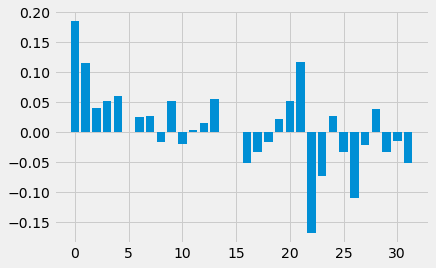

In [47]:
from matplotlib import pyplot

importance = log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'plot_importance' is not defined

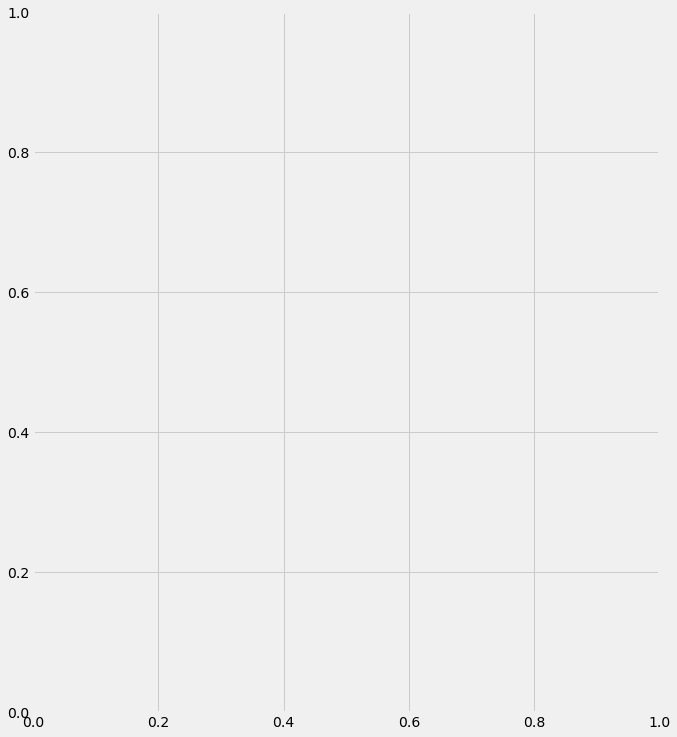

In [44]:
from sklearn.linear_model import LogisticRegression
from 
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [42]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(max_iter=3000)
clf.fit(X_train, Y_train)
coefs = np.abs(clf.coef_[0])
indices = np.argsort(coefs)[::-1]
plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

NameError: name 'X_train' is not defined

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = preds

submission.to_csv('baseline.csv', index=False)

In [ ]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

 ### Hyperparameter tunning for best models

In [ ]:
https://www.kaggle.com/code/poonaml/text-classification-using-spacy

In [ ]:

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Activation, Reshape, Concatenate
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.models import Model as KerasModel
import bisect